In [ ]:
# !pip install yfinance==0.1.63

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
import yfinance as yf
from ta import add_all_ta_features
from ta.utils import dropna

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
# def get_historical_data(sq, start_date):
#     api_key = '648c8cb4dd534243af7157d1baa1b18f'
#     api_url = f'https://api.twelvedata.com/time_series?symbol={sq}&interval=1day&outputsize=5000&apikey={api_key}'
#     raw_df = requests.get(api_url).json()
#     df = pd.DataFrame(raw_df['values']).iloc[::-1].set_index('datetime').astype(float)
#     df = df[df.index >= start_date]
#     df.index = pd.to_datetime(df.index)
#     return df

# XRP-USD = get_historical_data('XRP-USD', '2020-01-01')
# XRP-USD.head()

In [ ]:
def get_aroon(symbol, start_date):

    raw_df = yf.download(tickers = symbol, start='2019-09-01', end = '2021-08-11', interval='1h')
    raw_df.drop(columns = ['Adj Close'], inplace = True)
    # raw_df.reset_index(inplace = True)
    raw_df.rename(columns = {'index' : 'DateTime'}, inplace = True)
    
    mom_data = add_all_ta_features(raw_df, open='Open', high= 'High', low='Low', close='Close', volume='Volume')
    # mom_data.set_index('DateTime', inplace = True)
    aroon_up = mom_data['trend_aroon_up']
    aroon_down = mom_data['trend_aroon_down']
    
    ticker_aroon = mom_data[['Close', 'trend_aroon_up', 'trend_aroon_down']]

    return ticker_aroon

get_aroon('XRP-USD', '2019-09-01')


[*********************100%***********************]  1 of 1 completed
/root/venv/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/root/venv/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Close,trend_aroon_up,trend_aroon_down
2019-09-01 01:00:00+01:00,0.259100,NaN,NaN
2019-09-01 02:00:00+01:00,0.258400,NaN,NaN
2019-09-01 03:00:00+01:00,0.257800,NaN,NaN
2019-09-01 04:00:00+01:00,0.258500,NaN,NaN
2019-09-01 05:00:00+01:00,0.258100,NaN,NaN
...,...,...,...
2021-08-10 20:00:00+01:00,0.834750,72.0,36.0
2021-08-10 21:00:00+01:00,0.843693,68.0,32.0
2021-08-10 22:00:00+01:00,0.858775,100.0,28.0
2021-08-10 23:00:00+01:00,0.852293,96.0,24.0


[*********************100%***********************]  1 of 1 completed
/root/venv/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/root/venv/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


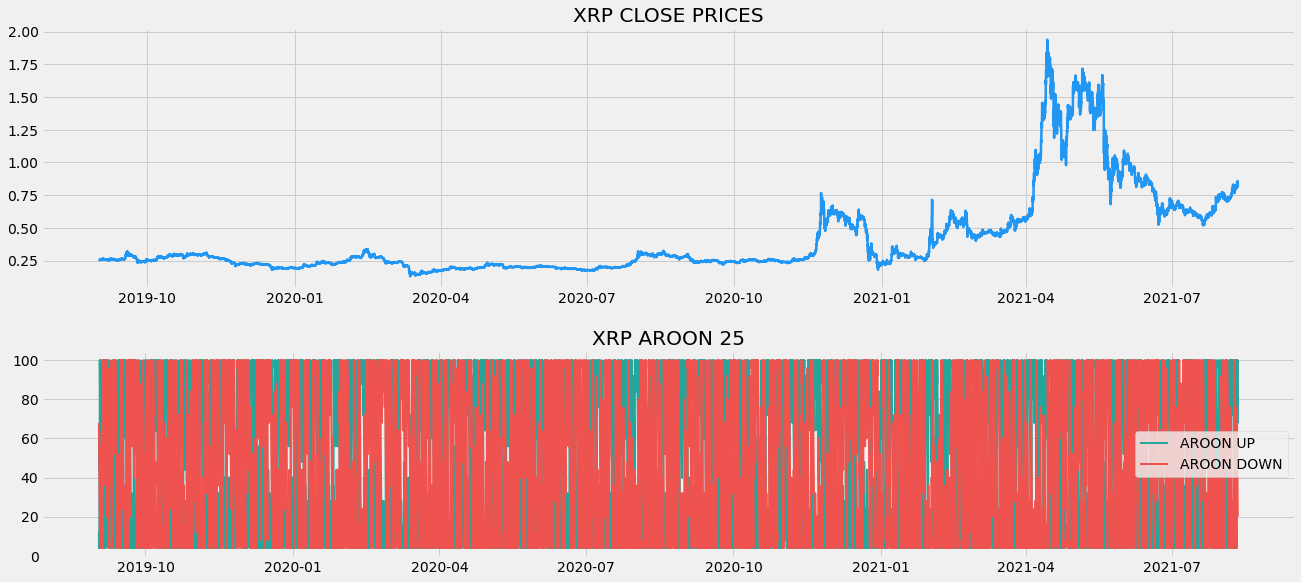

In [ ]:
df = get_aroon('XRP-USD','2019-09-01')

ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot(df['Close'], linewidth = 2.5, color = '#2196f3')
ax1.set_title('XRP CLOSE PRICES')
ax2.plot(df['trend_aroon_up'], color = '#26a69a', linewidth = 2, label = 'AROON UP')
ax2.plot(df['trend_aroon_down'], color = '#ef5350', linewidth = 2, label = 'AROON DOWN')
ax2.legend()
ax2.set_title('XRP AROON 25')
plt.show()

In [ ]:
# TRADE STRATEGY BASED ON AROON 25

df = get_aroon('XRP-USD','2019-09-01')

def implement_aroon_strategy(prices, up, down):
    buy_price = []
    sell_price = []
    aroon_signal = []
    signal = 0
    
    for i in range(len(prices)):
        if up[i] >= 70 and down[i] <= 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                aroon_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                aroon_signal.append(0)
        elif up[i] <= 30 and down[i] >= 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                aroon_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                aroon_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            aroon_signal.append(0)
            
    return buy_price, sell_price, aroon_signal

buy_price, sell_price, aroon_signal = implement_aroon_strategy(df['Close'], df['trend_aroon_up'], df['trend_aroon_down'])

[*********************100%***********************]  1 of 1 completed
/root/venv/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/root/venv/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


[*********************100%***********************]  1 of 1 completed
/root/venv/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/root/venv/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


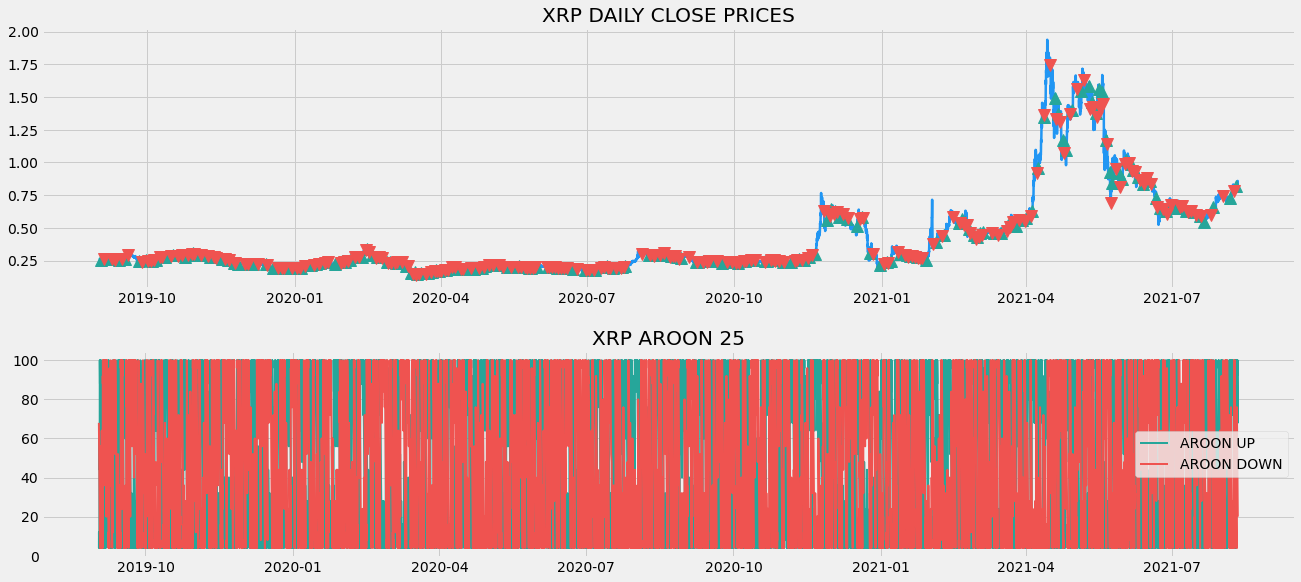

In [ ]:
# PLOTTING TRADE SIGNALS FOR XRP AROON 25 STRATEGY
df = get_aroon('XRP-USD','2019-09-01')

ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot(df['Close'], linewidth = 2.5, color = '#2196f3')
ax1.plot(df.index, buy_price, marker = '^', color = '#26a69a', markersize = 12)
ax1.plot(df.index, sell_price, marker = 'v', color = '#ef5350', markersize = 12)
ax1.set_title('XRP DAILY CLOSE PRICES')
ax2.plot(df['trend_aroon_up'], color = '#26a69a', linewidth = 2, label = 'AROON UP')
ax2.plot(df['trend_aroon_down'], color = '#ef5350', linewidth = 2, label = 'AROON DOWN')
ax2.legend()
ax2.set_title('XRP AROON 25')
plt.show()

In [ ]:
# CREATING POSITION FOR XRP BASED ON AROON 25 SIGNALS
position = []

df = get_aroon('XRP-USD', '2019-09-01')

for i in range(len(aroon_signal)):
    if aroon_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['Close'])):
    if aroon_signal[i] == 1:
        position[i] = 1
    elif aroon_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
aroon_up = df['trend_aroon_up']
aroon_down = df['trend_aroon_down']
close_price = df['Close']
aroon_signal = pd.DataFrame(aroon_signal).rename(columns = {0:'aroon_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'aroon_position'}).set_index(df.index)

frames = [close_price, aroon_up, aroon_down, aroon_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

[*********************100%***********************]  1 of 1 completed
/root/venv/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/root/venv/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Close,trend_aroon_up,trend_aroon_down,aroon_signal,aroon_position
2019-09-01 01:00:00+01:00,0.259100,NaN,NaN,0,1
2019-09-01 02:00:00+01:00,0.258400,NaN,NaN,0,1
2019-09-01 03:00:00+01:00,0.257800,NaN,NaN,0,1
2019-09-01 04:00:00+01:00,0.258500,NaN,NaN,0,1
2019-09-01 05:00:00+01:00,0.258100,NaN,NaN,0,1
...,...,...,...,...,...
2021-08-10 20:00:00+01:00,0.834750,72.0,36.0,0,1
2021-08-10 21:00:00+01:00,0.843693,68.0,32.0,0,1
2021-08-10 22:00:00+01:00,0.858775,100.0,28.0,0,1
2021-08-10 23:00:00+01:00,0.852293,96.0,24.0,0,1


In [ ]:
# BACKTESTING THE XRP AROON TRADE STRATEGY
df = get_aroon('XRP-USD', '2019-09-01')

df_ret = pd.DataFrame(np.diff(df['Close'])).rename(columns = {0:'returns'})
aroon_strategy_ret = []

for i in range(len(df_ret)):
    returns = df_ret['returns'][i]*strategy['aroon_position'][i]
    aroon_strategy_ret.append(returns)
    
aroon_strategy_ret_df = pd.DataFrame(aroon_strategy_ret).rename(columns = {0:'aroon_returns'})
investment_value = 100000
number_of_stocks = floor(investment_value/df['Close'][-1])
aroon_investment_ret = []

for i in range(len(aroon_strategy_ret_df['aroon_returns'])):
    returns = number_of_stocks*aroon_strategy_ret_df['aroon_returns'][i]
    aroon_investment_ret.append(returns)

aroon_investment_ret_df = pd.DataFrame(aroon_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(aroon_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the Aroon strategy by investing $100k in XRP : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the Aroon strategy : {}%'.format(profit_percentage), attrs = ['bold']))

[*********************100%***********************]  1 of 1 completed
/root/venv/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/root/venv/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])
Profit gained from the Aroon strategy by investing $100k in XRP : 150848.13
Profit percentage of the Aroon strategy : 150%


In [ ]:
strategy.to_csv('XRP AROON 25 TRADE STRATEGY.CSV')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>